In [5]:
import numpy as np
from tensorflow.keras import datasets
mnist = datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #link for more details: https://keras.io/api/datasets/mnist/#load_data-function

In [6]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


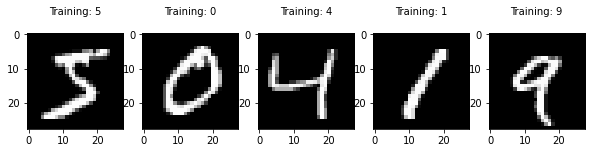

In [7]:
#visualisation
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 10)

In [9]:
#Training
from sklearn.linear_model import LogisticRegression
training_images = []
for img in x_train:
  flattened_img = img.flatten()
  training_images.append(flattened_img)

print(np.shape(training_images))

logisticRegr = LogisticRegression()
logisticRegr.fit(training_images, y_train)


(60000, 784)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
pred_1 = logisticRegr.predict(x_test[0].reshape(1,-1))
pred_1

array([7], dtype=uint8)

In [15]:
test_images = []
for img in x_test:
  flattened_img = img.flatten()
  test_images.append(flattened_img)

pred_all = logisticRegr.predict(test_images)
pred_all

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
pred_5 = logisticRegr.predict(test_images[0:10])  #slicing example
pred_5

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

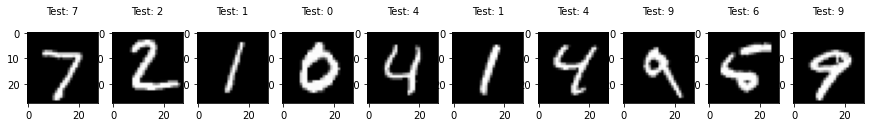

In [20]:
plt.figure(figsize=(15, 5))
for index, (image, label) in enumerate(zip(test_images[0:10], pred_all[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Test: {}\n'.format(label), fontsize = 10)

In [26]:
score = logisticRegr.score(test_images, y_test)
print(score)

0.9255


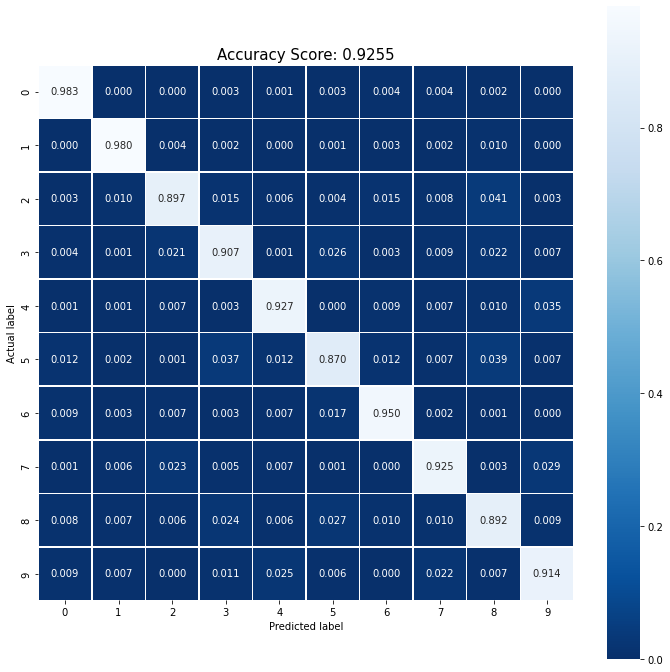

In [28]:
#Result visualisation using confusion matrix
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred_all, normalize='true')
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);